# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('/content/train_house.csv')
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
## mengecek jumlah baris kosong atau missing values
house.dropna(axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
# mengecek data kembali
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Tahap berikutnya, kamu akan mempraktekkan visualisasi data 1D. Untuk variabel kategorikal, buatlah bar plot dari :

1.   Utilities
2.   HouseStyle
3.   ExterQual

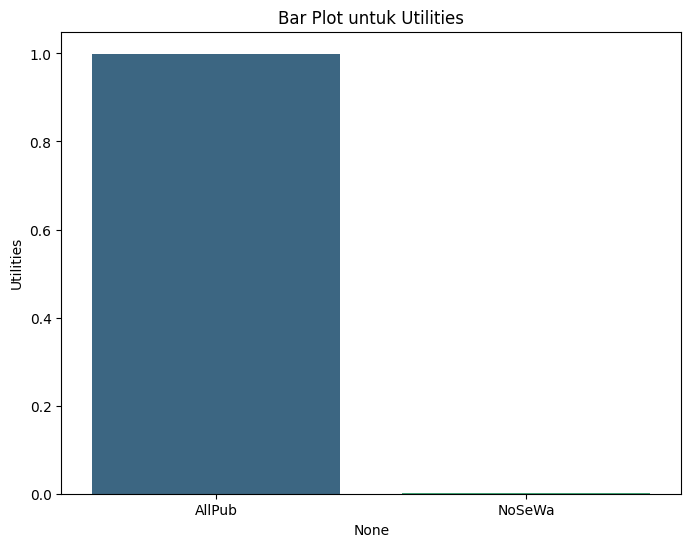

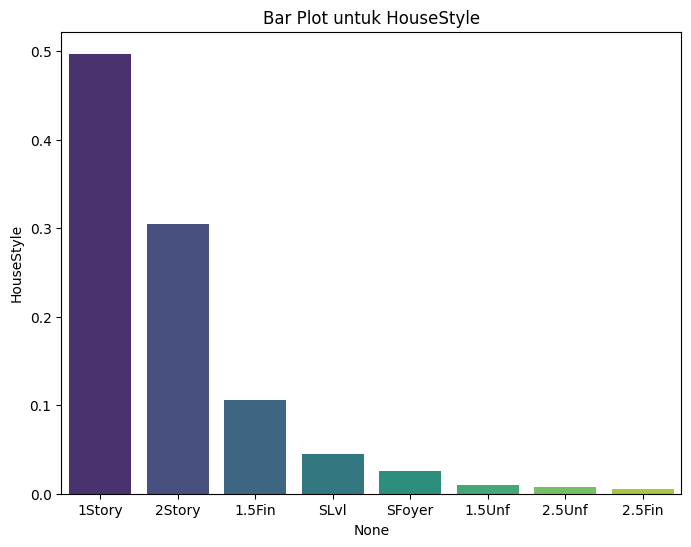

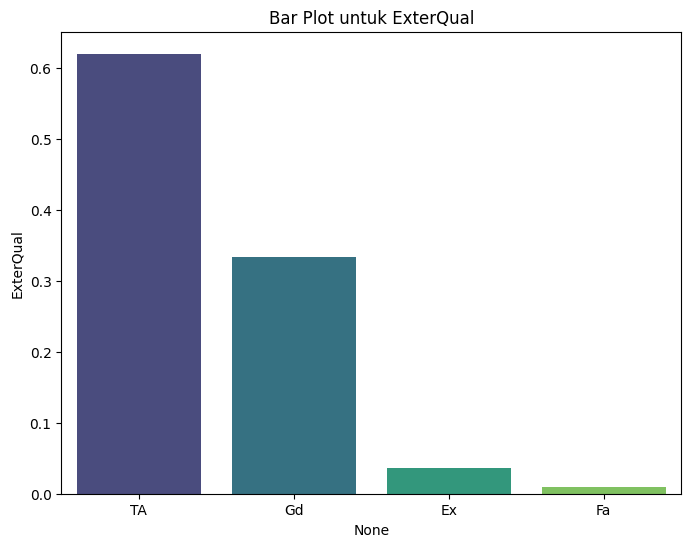

In [ ]:
# Menampilkan visualisasi barplot 1D
df = house[['Utilities', 'HouseStyle', 'ExterQual']]

kategori = ['Utilities', 'HouseStyle', 'ExterQual']

for feature in kategori:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts(normalize=True), palette = 'viridis')
    plt.title(f'Bar Plot untuk {feature}')
    plt.show()

Membuat histogram dari variabel numerikal berikut:
1.   SalePrice
2.   GrLivArea
3.    PoolArea

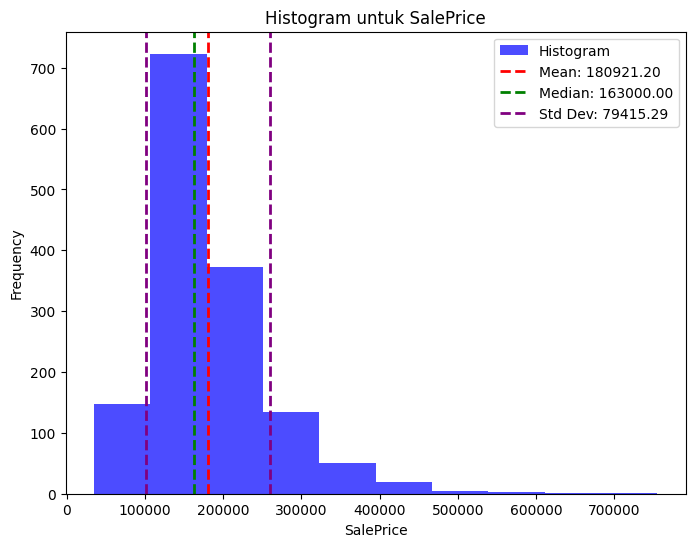

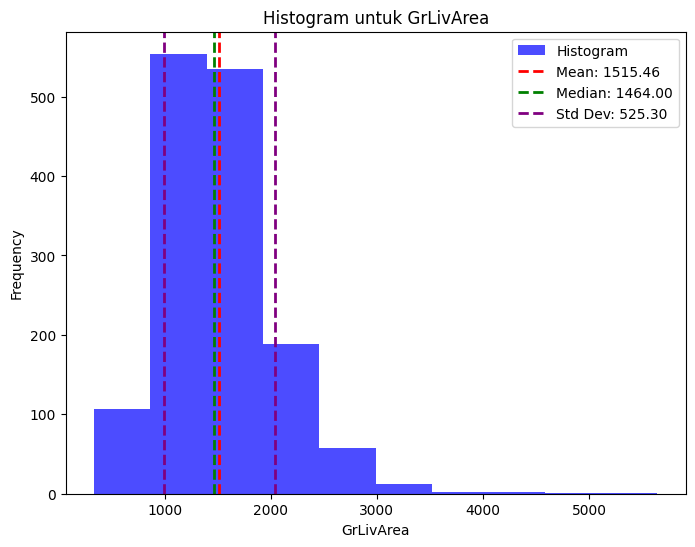

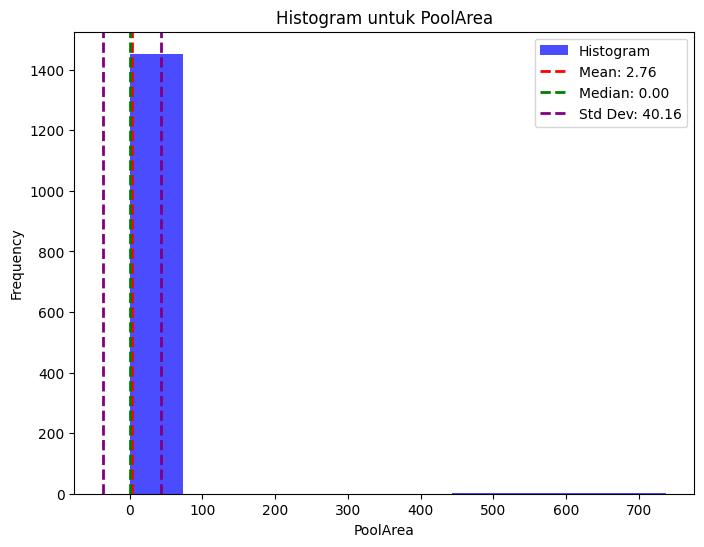

In [ ]:
dat = house[['SalePrice', 'GrLivArea', 'PoolArea']]

x = ['SalePrice', 'GrLivArea', 'PoolArea']

for feature in x:
    plt.figure(figsize=(8, 6))
     # Menampilkan histogram
    plt.hist(dat[feature], bins=10, alpha=0.7, color='blue', label='Histogram')

    # Menambahkan garis vertikal untuk mean, median, dan standar deviasi
    mean_val = np.mean(dat[feature])
    median_val = np.median(dat[feature])
    std_dev_val = np.std(dat[feature])

    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    plt.axvline(mean_val + std_dev_val, color='purple', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev_val:.2f}')
    plt.axvline(mean_val - std_dev_val, color='purple', linestyle='dashed', linewidth=2)

    # Menambahkan label dan judul
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram untuk {feature}')

    # Menambahkan legenda
    plt.legend()

    # Menampilkan plot
    plt.show()

# 1D Visualization

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual`

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

In [ ]:
### Tulis kode Anda di sini

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [ ]:
### Tulis kode Anda di sini

### ExterQual

ExterQual: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

In [ ]:
### Tulis kode Anda di sini

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

In [ ]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

#### **Analisis tentang variabel `SalePrice`**

* [*tulis analisis dan pertanyaan Anda di sini*]

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

In [ ]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

#### **Analisis tentang variabel `GrlivArea`**

* [*tulis analisis dan pertanyaan Anda di sini*]

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

In [ ]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

#### **Analisis tentang variabel `GarageArea`**

* [*tulis analisis dan pertanyaan Anda di sini*]

## Pemrosesan Data Variabel Numerikal

In [ ]:
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Transformasi log-10 SalePrice
dt1 = house[['SalePrice']]
SalePrice_trans = np.log10(dt1)
SalePrice_trans.head(5)
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

,SalePrice
0,5.319106
1,5.258877
2,5.349278
3,5.146128
4,5.397940


In [ ]:
# Transformasi log-10 GrLivArea
dt2 = house[['GrLivArea']]
GrLivArea_trans = np.log10(dt2)
GrLivArea_trans.head(5)
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

,GrLivArea
0,3.232996
1,3.101059
2,3.251881
3,3.234770
4,3.342028


In [ ]:
# Menghilangkan nilai nol pada GarageArea
dt3 = house[['GarageArea']]
GarageArea_trans = np.log10(dt3)
GarageArea_trans.head(5)
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


,GarageArea
0,2.738781
1,2.662758
2,2.783904
3,2.807535
4,2.922206


#### **Penjelasan dan analisis tentang pemrosesan data**

* [*tulis penjelasan dan analisis Anda di sini*]

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

In [ ]:
numerik = house[['GrLivArea', 'GarageArea', 'SalePrice']]

# Melakukan analisis regresi untuk setiap variabel x
for variabel_x in numerik.columns[:-1]:
    # Mendapatkan hasil regresi
    slope, intercept, r, p, se = linregress(x=numerik[variabel_x], y=numerik['SalePrice'])

    # Menampilkan hasil regresi
    print("Variabel x:", variabel_x)
    print("slope:", slope)
    print("intercept:", intercept)
    print("r:", r)
    print("p:", p)
    print("se:", se)

Variabel x: GrLivArea
slope: 107.13035896582521
intercept: 18569.02585648722
r: 0.7086244776126523
p: 4.5180336467755074e-223
se: 2.7936210388899054
Variabel x: GarageArea
slope: 231.6456145094045
intercept: 71357.42140747684
r: 0.6234314389183617
p: 5.265038167975755e-158
se: 7.608440114263163


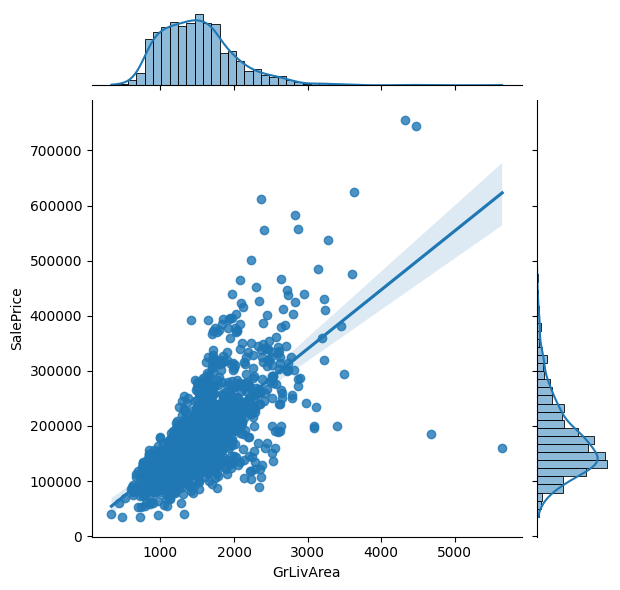

In [ ]:
sns.jointplot(data=numerik, x="GrLivArea", y="SalePrice", kind="reg")

# `GarageArea` dengan `SalePrice`

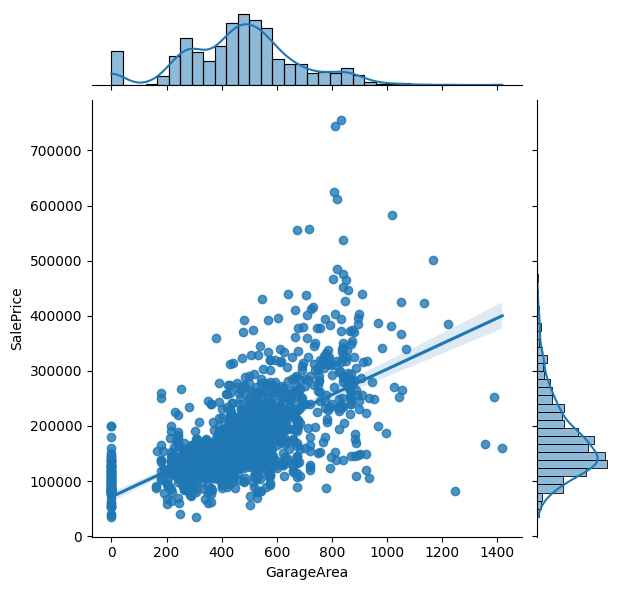

In [ ]:
sns.jointplot(data=numerik, x="GarageArea", y="SalePrice", kind="reg")

#### **Hipotesis tentang hubungan antar-variabel**

* [*tulis hipotesis Anda di sini*]